# Analysing the PISA 2012 datset
## by Gad Mohamed

## Investigation Overview

In this investigation, I am going to answer the following questions:

1.   Do parents' educational background influence students' grades ?

3.   How studying time affects students' grades ?

## Dataset Overview

> In this investigation, I am using PISA2012 dataset. PISA is an education assessment dataset based on survey's on students, parents and teachers. The dataset is huge, but in this analysis, I do a lot of cleaning to focus only on the features relevant to the questions of interest.

> The original PISA2012 dataset contains 485490 records and 636 features. After removing irrelevant features and merging parents' qualifications, study time, and subjects' scores, the clean dataset has 129199 records and 9 features.


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ke45clRwNwIE4hHyVPzIDFOv24ZPqeLE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ke45clRwNwIE4hHyVPzIDFOv24ZPqeLE" -O clean_pisa.csv && rm -rf /tmp/cookies.txt
clean_pisa = pd.read_csv("clean_pisa.csv")
clean_pisa.head()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Parents' qualifications vs students' grades)

> Although students' scores were increasing linearly with parents' qualifications, scores start to decrease at very high qualifications. May be this is a signal that highly qualified parents are busy caring about their children

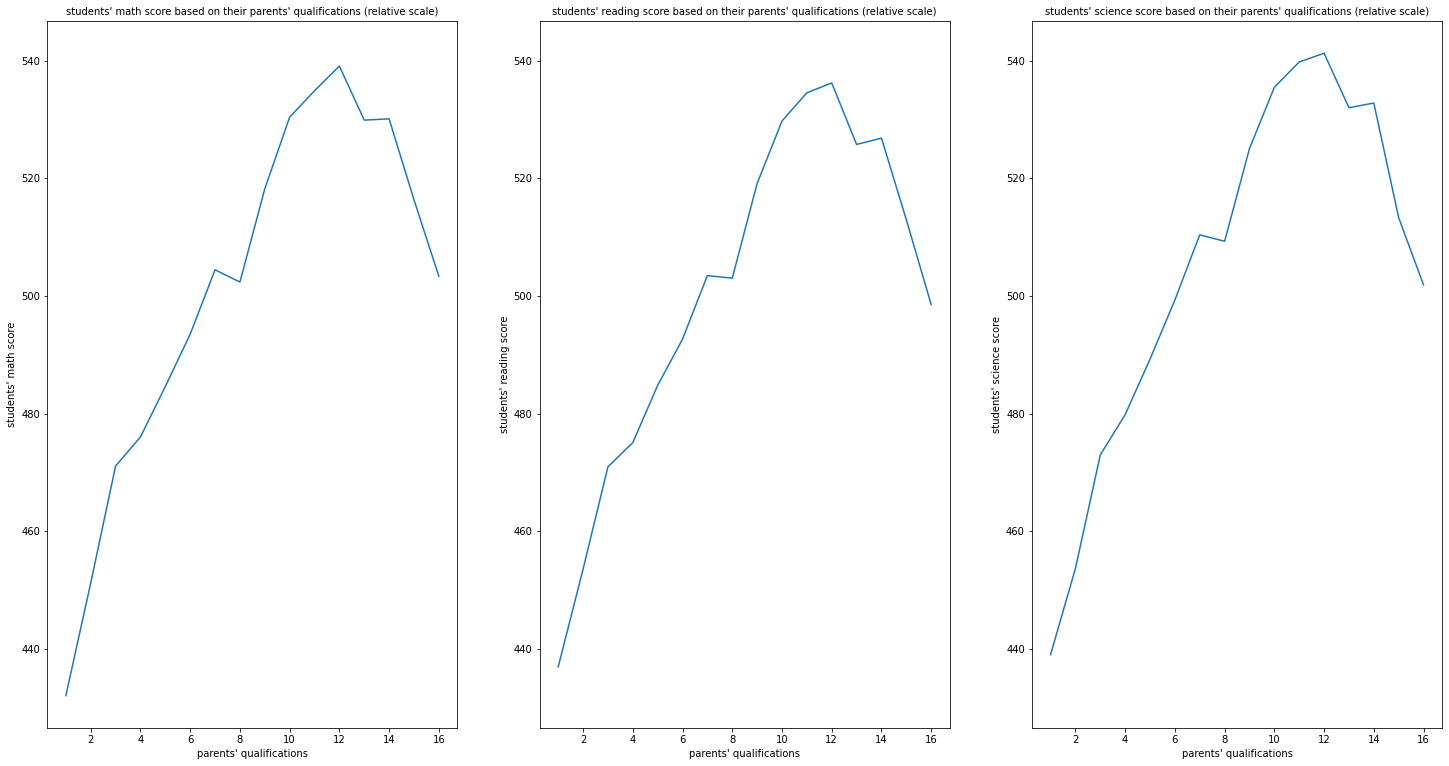

In [9]:
plt.figure(figsize = (25,13))

ax1 = plt.subplot(1,3,1)
math_means = clean_pisa.groupby(['parents_qualifications']).average_math_score.mean()
plt.plot(math_means.index, math_means.values) 
plt.xlabel("parents' qualifications")
plt.ylabel("students' math score")
plt.title("students' math score based on their parents' qualifications (relative scale)", fontsize = 10)

ax2 = plt.subplot(1,3,2, sharey = ax1)
reading_means = clean_pisa.groupby(['parents_qualifications']).average_reading_score.mean()
plt.plot(reading_means.index, reading_means.values)
plt.xlabel("parents' qualifications")
plt.ylabel("students' reading score")
plt.title("students' reading score based on their parents' qualifications (relative scale)", fontsize = 10)


ax3 = plt.subplot(1,3,3, sharey = ax2)
sci_means = clean_pisa.groupby(['parents_qualifications']).average_sci_score.mean()
plt.plot(sci_means.index, sci_means.values)
plt.xlabel("parents' qualifications") 
plt.ylabel("students' science score")
plt.title("students' science score based on their parents' qualifications (relative scale)", fontsize = 10)
plt.show()



## (Fathers' vs Mothers' educational qualifications)

> the following regression plot shows a perfect linear relationship between mothers' and fathers' educational qualifications i.e. parents usually have similar educational background 

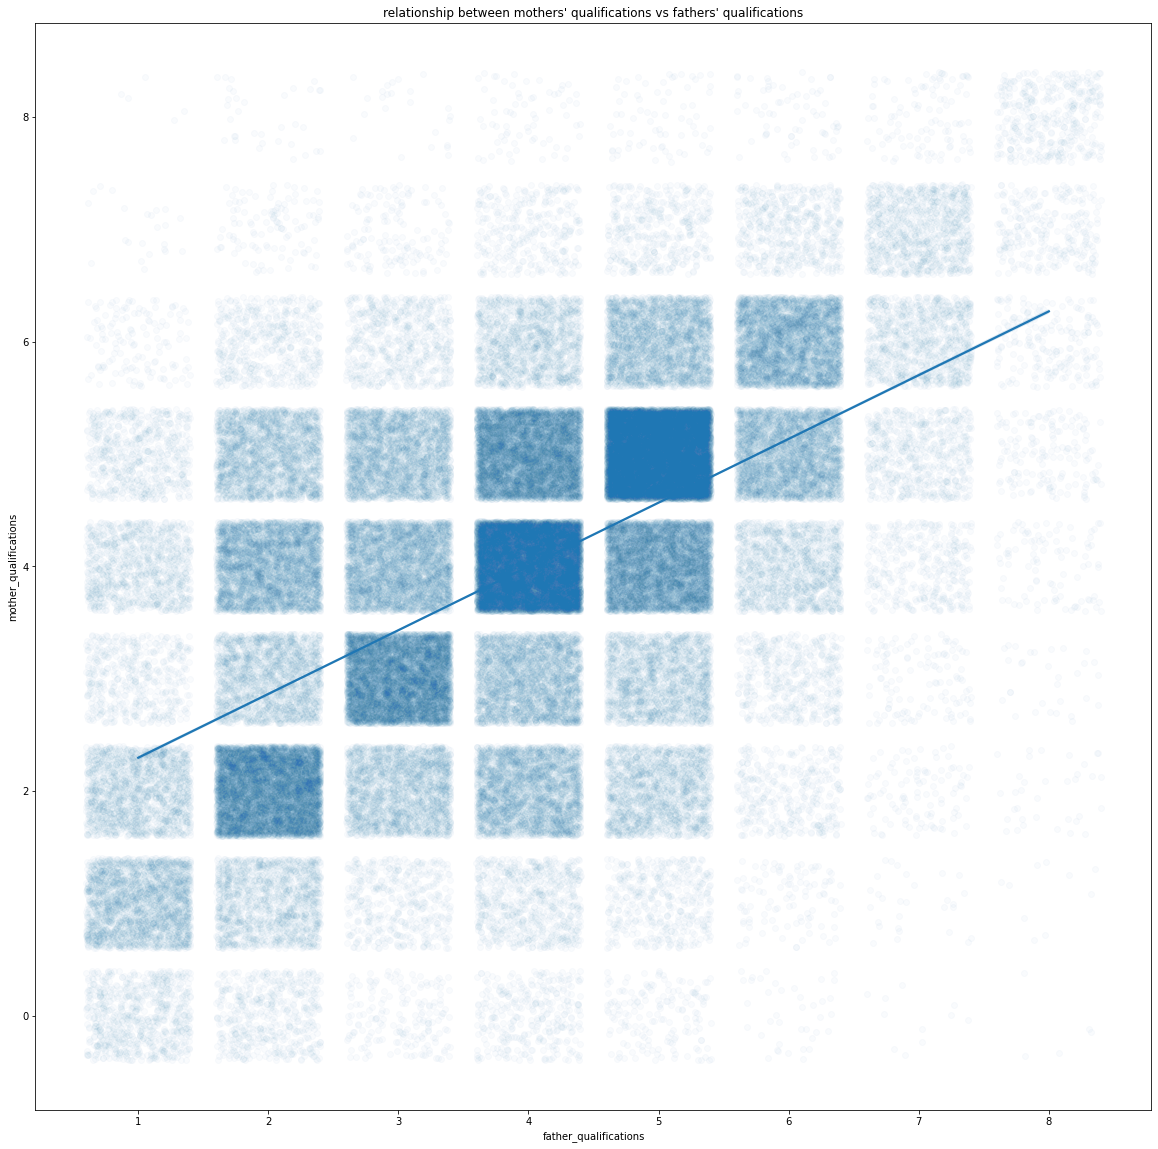

In [10]:
plt.figure(figsize = (20,20))

sb.regplot(x = clean_pisa.father_qualifications, y = clean_pisa.mother_qualifications, x_jitter = 0.4, y_jitter = 0.4, scatter_kws = {'alpha':1/40}, color = sb.color_palette()[0])
plt.title("relationship between mothers' qualifications vs fathers' qualifications")
plt.show()

## (Students' grades relation with parents' qualifications and studying time)



> The following heat map shows two clusters of blocks, in the upper left and in the lower right. The first cluster (in the upper left) shows high correlation among students' scores i.e. students tend to get similar results in most of their subjects. The second cluster (in the lower right) shows high correlation between fathers' and mothers' qualifications. However, the other two sides, upper right and lower left shows low correlation. Surprisingly, average study time of students didn't have much influence (correlation) on their grades.


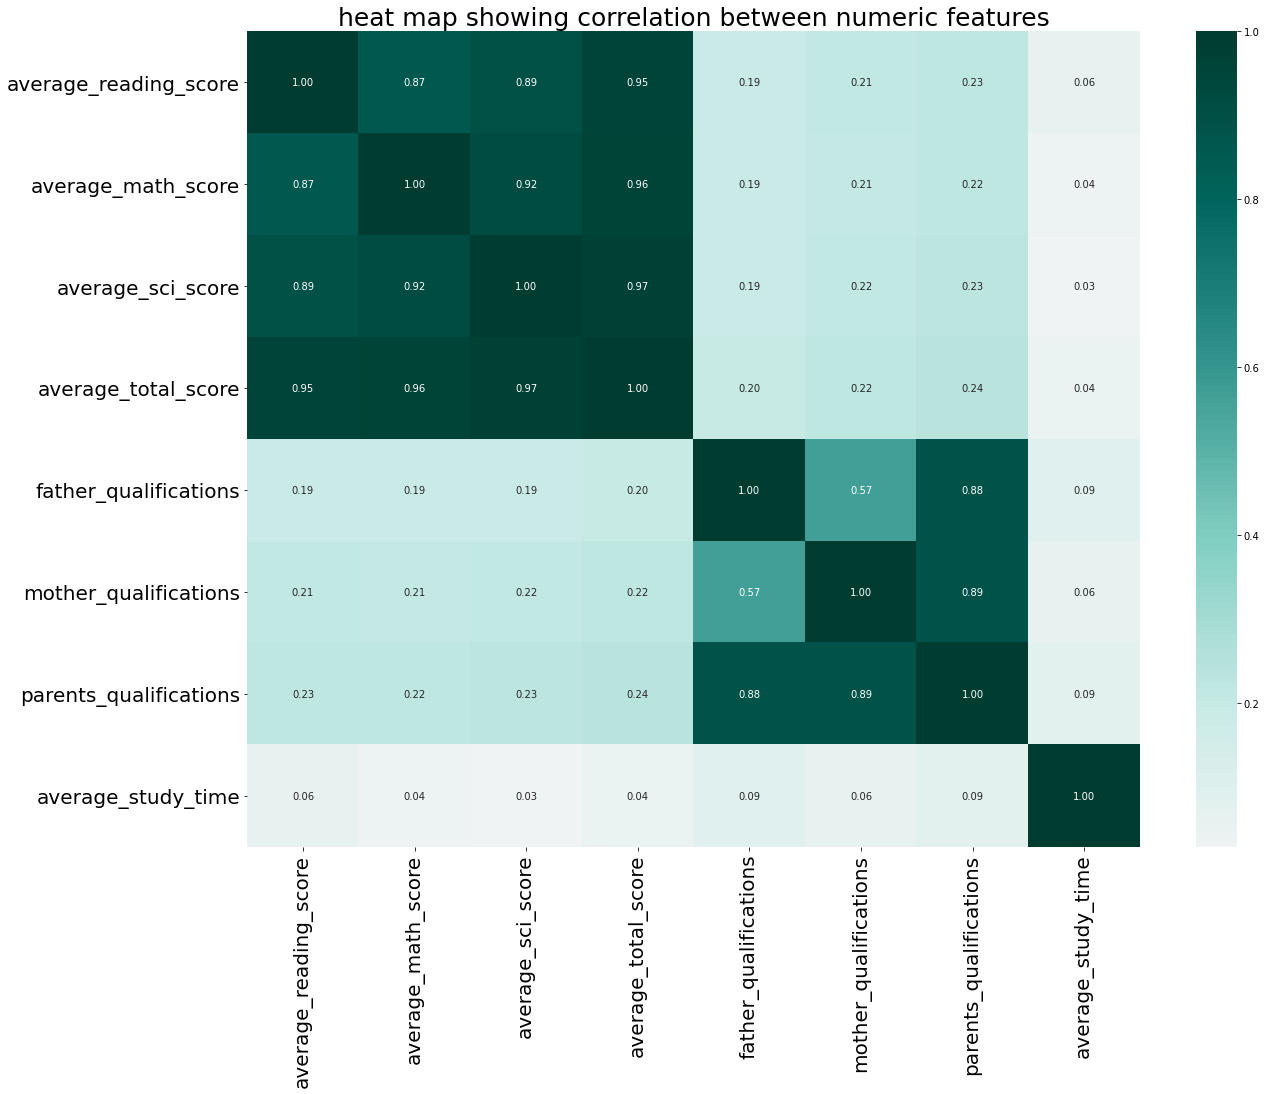

In [11]:
plt.figure(figsize = (20, 15))

sb.heatmap(clean_pisa.corr(), annot = True, fmt = '.2f', cmap = 'BrBG', center = 0)
plt.title('heat map showing correlation between numeric features', fontsize = 25)
plt.xticks(rotation = 90)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)

plt.show()